In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [9]:
data = pd.read_csv('Covid Data.csv')
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1.0,1.0,1.0,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1.0,2.0,1.0,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1.0,2.0,2.0,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1.0,1.0,1.0,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1.0,2.0,1.0,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848728 entries, 0 to 848727
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 848728 non-null  int64  
 1   MEDICAL_UNIT          848727 non-null  float64
 2   SEX                   848727 non-null  float64
 3   PATIENT_TYPE          848727 non-null  float64
 4   DATE_DIED             848727 non-null  object 
 5   INTUBED               848727 non-null  float64
 6   PNEUMONIA             848727 non-null  float64
 7   AGE                   848727 non-null  float64
 8   PREGNANT              848727 non-null  float64
 9   DIABETES              848727 non-null  float64
 10  COPD                  848727 non-null  float64
 11  ASTHMA                848727 non-null  float64
 12  INMSUPR               848727 non-null  float64
 13  HIPERTENSION          848727 non-null  float64
 14  OTHER_DISEASE         848727 non-null  float64
 15  

In [11]:
data.isna().sum()

,0
USMER,0
MEDICAL_UNIT,1
SEX,1
PATIENT_TYPE,1
DATE_DIED,1
INTUBED,1
PNEUMONIA,1
AGE,1
PREGNANT,1
DIABETES,1


In [12]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [13]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,848728.000000,848727.000000,848727.000000,848727.00000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000,848727.000000
mean,1.611678,8.268411,1.506007,1.22374,76.517290,3.653792,42.502723,50.401933,2.182896,2.270213,2.251907,2.315800,2.127485,2.450726,2.272394,2.129357,2.264627,2.228357,4.908622,76.556220
std,0.487369,3.803270,0.499964,0.41675,39.136598,13.152589,17.123740,47.503208,5.494210,5.237007,5.205001,5.622364,5.335781,6.787839,5.304342,5.265181,5.224192,5.424020,1.880789,39.085247
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.00000,97.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
50%,2.000000,9.000000,2.000000,1.00000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,12.000000,2.000000,1.00000,97.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,12.000000,2.000000,2.00000,99.000000,99.000000,121.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848728 entries, 0 to 848727
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 848728 non-null  int64  
 1   MEDICAL_UNIT          848727 non-null  float64
 2   SEX                   848727 non-null  float64
 3   PATIENT_TYPE          848727 non-null  float64
 4   DATE_DIED             848727 non-null  object 
 5   INTUBED               848727 non-null  float64
 6   PNEUMONIA             848727 non-null  float64
 7   AGE                   848727 non-null  float64
 8   PREGNANT              848727 non-null  float64
 9   DIABETES              848727 non-null  float64
 10  COPD                  848727 non-null  float64
 11  ASTHMA                848727 non-null  float64
 12  INMSUPR               848727 non-null  float64
 13  HIPERTENSION          848727 non-null  float64
 14  OTHER_DISEASE         848727 non-null  float64
 15  

In [15]:
data.isna().sum()

,0
USMER,0
MEDICAL_UNIT,1
SEX,1
PATIENT_TYPE,1
DATE_DIED,1
INTUBED,1
PNEUMONIA,1
AGE,1
PREGNANT,1
DIABETES,1


In [16]:
boolean_cols = ['ASTHMA' , 'ICU' , 'TOBACCO' ]

for col in boolean_cols :
  print(col , data[col].nunique() , sorted(data[col].unique()))

ASTHMA 3 [1.0, 2.0, 98.0, nan]
ICU 4 [1.0, 2.0, 97.0, 99.0, nan]
TOBACCO 3 [1.0, 2.0, 98.0, nan]


In [17]:
for col in data.columns :
   if col in  ['DATE_DIED' , 'MEDICAL_UNIT' , 'AGE' , 'CLASIFFICATION_FINAL' ] :
             continue
   print(col , data[col].nunique() , sorted(data[col].unique()))

USMER 2 [1, 2]
SEX 2 [1.0, 2.0, nan]
PATIENT_TYPE 2 [1.0, 2.0, nan]
INTUBED 4 [1.0, 2.0, 97.0, 99.0, nan]
PNEUMONIA 3 [1.0, 2.0, 99.0, nan]
PREGNANT 4 [1.0, 2.0, 97.0, 98.0, nan]
DIABETES 3 [1.0, 2.0, 98.0, nan]
COPD 3 [1.0, 2.0, 98.0, nan]
ASTHMA 3 [1.0, 2.0, 98.0, nan]
INMSUPR 3 [1.0, 2.0, 98.0, nan]
HIPERTENSION 3 [1.0, 2.0, 98.0, nan]
OTHER_DISEASE 3 [1.0, 2.0, 98.0, nan]
CARDIOVASCULAR 3 [1.0, 2.0, 98.0, nan]
OBESITY 3 [1.0, 2.0, 98.0, nan]
RENAL_CHRONIC 3 [1.0, 2.0, 98.0, nan]
TOBACCO 3 [1.0, 2.0, 98.0, nan]
ICU 4 [1.0, 2.0, 97.0, 99.0, nan]


In [18]:
pearsonr(data['SEX'] , data['PREGNANT'])

ValueError: array must not contain infs or NaNs

In [19]:
for col in data.columns :
     if col in  ['DATE_DIED' , 'MEDICAL_UNIT' , 'AGE' , 'CLASIFFICATION_FINAL', 'PATIENT_TYPE' , 'USMER','SEX' ] :
            continue
     data.loc[data[col] == 97 , col] = np.nan
     data.loc[data[col] == 98 , col] = np.nan
     data.loc[data[col] == 99 , col] = np.nan

In [20]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1.0,1.0,1.0,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN
1,2,1.0,2.0,1.0,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,NaN
2,2,1.0,2.0,2.0,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1.0,1.0,1.0,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,NaN
4,2,1.0,2.0,1.0,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848723,1,12.0,1.0,1.0,9999-99-99,NaN,2.0,26.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,NaN
848724,2,12.0,1.0,1.0,9999-99-99,NaN,2.0,22.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7.0,NaN
848725,2,12.0,1.0,1.0,9999-99-99,NaN,2.0,30.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,NaN
848726,2,12.0,1.0,1.0,9999-99-99,NaN,2.0,34.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,7.0,NaN


In [21]:
data.isna().sum()

,0
USMER,0
MEDICAL_UNIT,1
SEX,1
PATIENT_TYPE,1
DATE_DIED,1
INTUBED,665934
PNEUMONIA,15838
AGE,1
PREGNANT,432463
DIABETES,2772


In [22]:
data.isna().sum() /data.shape[0]  * 100

,0
USMER,0.000000
MEDICAL_UNIT,0.000118
SEX,0.000118
PATIENT_TYPE,0.000118
DATE_DIED,0.000118
INTUBED,78.462593
PNEUMONIA,1.866087
AGE,0.000118
PREGNANT,50.954252
DIABETES,0.326606


In [23]:
data.loc[data['SEX'] == 2     , 'PREGNANT'] = 2
data.loc[data['PATIENT_TYPE']==1 , 'ICU'] = -1
data.loc[data['PATIENT_TYPE']==1 , 'INTUBED'] = -1

In [24]:
data.isna().sum()  / data.shape[0]   * 100

,0
USMER,0.000000
MEDICAL_UNIT,0.000118
SEX,0.000118
PATIENT_TYPE,0.000118
DATE_DIED,0.000118
INTUBED,0.836664
PNEUMONIA,1.866087
AGE,0.000118
PREGNANT,0.353588
DIABETES,0.326606


In [25]:
data.dropna(inplace = True)

In [26]:
data.shape[0]

822089

In [27]:
data['DATE_DIED']

,DATE_DIED
0,03/05/2020
1,03/06/2020
2,09/06/2020
3,12/06/2020
4,21/06/2020
...,...
848722,9999-99-99
848723,9999-99-99
848724,9999-99-99
848725,9999-99-99


In [28]:
data['DEATH'] = (data['DATE_DIED'] !='9999-99-99').map({True : 1 , False : 0})

In [29]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1.0,1.0,1.0,03/05/2020,-1.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,-1.0,1
1,2,1.0,2.0,1.0,03/06/2020,-1.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,-1.0,1
2,2,1.0,2.0,2.0,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1
3,2,1.0,1.0,1.0,12/06/2020,-1.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,-1.0,1
4,2,1.0,2.0,1.0,21/06/2020,-1.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848722,2,12.0,2.0,1.0,9999-99-99,-1.0,2.0,35.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7.0,-1.0,0
848723,1,12.0,1.0,1.0,9999-99-99,-1.0,2.0,26.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,-1.0,0
848724,2,12.0,1.0,1.0,9999-99-99,-1.0,2.0,22.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7.0,-1.0,0
848725,2,12.0,1.0,1.0,9999-99-99,-1.0,2.0,30.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,-1.0,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='DEATH', ylabel='count'>

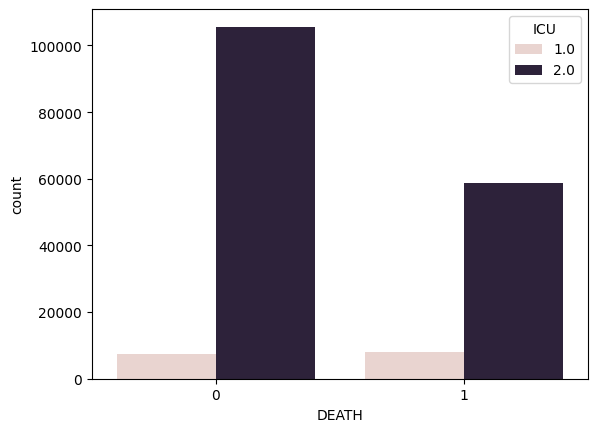

In [30]:
sns.countplot(x = 'DEATH'   , data = data[data['PATIENT_TYPE']==2]   , hue= 'ICU')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='DEATH', ylabel='count'>

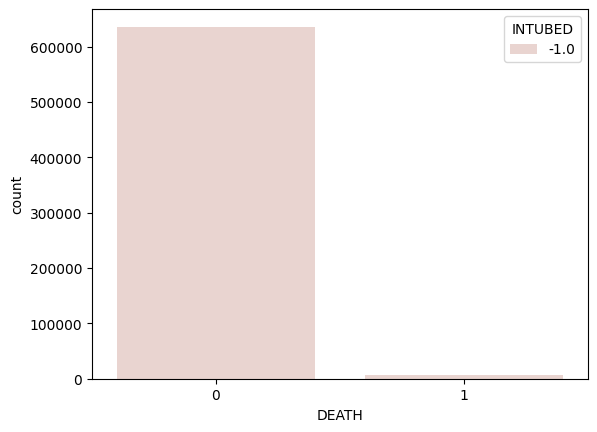

In [31]:
sns.countplot(x = 'DEATH'   , data = data[data['PATIENT_TYPE']==1]   , hue= 'INTUBED')

#Data Modeling

In [32]:
from sklearn.model_selection  import train_test_split

In [33]:
X = data.drop(columns=['DATE_DIED'  , 'DEATH'])
y = data['DEATH']

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,random_state=11 ,  test_size=0.35)

In [35]:
print(X_train.shape  , y_train.shape)
print(X_test.shape  , y_test.shape)

(534357, 20) (534357,)
(287732, 20) (287732,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from  sklearn.ensemble import AdaBoostClassifier as ABC

In [37]:
clfs = []
#clf.append(KNN(n_neighbors = 15))
clfs.append(DTC(criterion = 'gini'))
clfs.append(RFC(criterion='gini' , n_estimators =20 ))
clfs.append(ABC(estimator = DTC(criterion  = 'gini') ,
                                                                      n_estimators = 20))

In [38]:
for clf in clfs :
  clf.fit(X_train  , y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [40]:
from sklearn.metrics import  accuracy_score , f1_score
from sklearn.metrics import  precision_score , recall_score

In [43]:
for clf in clfs :
  print(f1_score(y_true = y_test , y_pred=clf.predict(X_test)))

0.5459169616175318
0.5825970320849923
0.5640708693860733


In [45]:
for clf in clfs :
  print(accuracy_score(y_true = y_test , y_pred=clf.predict(X_test)))

0.9255383481851167
0.9318636787010135
0.9264593441118819


In [47]:
for clf in clfs :
  print(precision_score(y_true = y_test , y_pred=clf.predict(X_test)))

0.6033731553056922
0.6474847380625621
0.6030305699938331


In [48]:
for clf in clfs :
  print(recall_score(y_true = y_test , y_pred=clf.predict(X_test)))

0.49845189256134376
0.5295301493923679
0.529839770880099


In [49]:
pip install imblearn

In [51]:
print(y_train.shape[0])
print(y_train.sum()/y_train.shape[0])

534357
0.08872719923197413


In [67]:
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS

In [68]:
ros =ROS(sampling_strategy =2/3 , random_state =111)

X_train_ros , y_train_ros = ros.fit_resample(X_train , y_train)


print(y_train_ros.shape[0])
print(y_train_ros.sum()/y_train_ros.shape[0])

811575
0.4


In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE(k_neighbors = 7 , sampling_strategy =2/3 , random_state = 111)

X_train_smote , y_train_smote = ros.fit_resample(X_train , y_train)


print(y_train_smote.shape[0])
print(y_train_smote.sum()/y_train_smote.shape[0])

695635
0.29999928123225544


In [76]:
rus = RUS(sampling_strategy =2/3 , random_state = 111)

X_train_rus , y_train_rus = rus.fit_resample(X_train , y_train)


print(y_train_rus.shape[0])
print(y_train_rus.sum()/y_train_rus.shape[0])

118530
0.4


In [77]:
ros = ROS(sampling_strategy = 3/7 , random_state = 111)
X_train_ros , y_train_ros = ros.fit_resample(X_train , y_train)

print(y_train_ros.shape[0])
print(y_train_ros.sum()/y_train_ros.shape[0])

695635
0.29999928123225544


In [78]:
rus = RUS(sampling_strategy = 3/7 , random_state = 111)
X_train_rus , y_train_rus = rus.fit_resample(X_train , y_train)

print(y_train_rus.shape[0])
print(y_train_rus.sum()/y_train_rus.shape[0])

158040
0.3


In [79]:
for clf in clfs :
  clf.fit(X_train , y_train)
  clf.fit(X_train_ros , y_train_ros)
  clf.fit(X_train_rus , y_train_rus)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
